In [59]:
import numpy as np

def fakeSpectrum(x) :
    return x * np.exp(-0.225*x) * np.log(x) + 1

def fakeTrough(x,mu,sigma) :
    return 0.2*fakeSpectrum(mu)*np.exp(-(x-mu)**2/2/sigma)

def generateFalseData(NPoints, MSpectra, KEndmembers, noiseV=0, noiseB=0) :
    
    # create false abundances (breakup 1 into K parts)
    A = np.random.random([KEndmembers, NPoints])
    sumA = np.sum(A,axis=0)
    A = A/sumA

    # create false pure spectra
    XF = np.linspace(0.01,10.01,MSpectra)
    F = np.zeros([KEndmembers,MSpectra]) + fakeSpectrum(XF)
    centers = np.random.random([KEndmembers])*8.5 + 1
    F = F - fakeTrough((np.zeros([KEndmembers,MSpectra])+XF).T,centers,0.1).T
    
    # add random noise to I
    noise = noiseV*np.random.randn(NPoints, MSpectra) + noiseB
    I = np.dot(A.T,F) + noise
    
    # normalize spectra for I and F
    normsI = np.sum(I,axis=1)
    I = (I.T/normsI).T
    normsF = np.sum(F,axis=1)
    F = (F.T/normsF).T
    
    return XF,A,F,I,centers

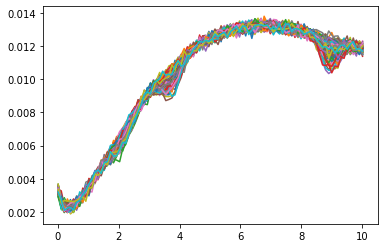

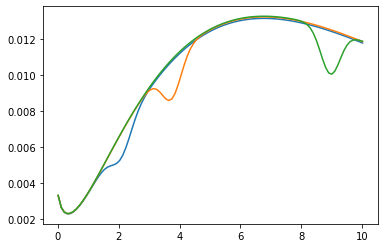

In [69]:
import matplotlib.pyplot as plt

XF, A, F, I, cents = generateFalseData(100,100,3,0.05,0)
plt.plot(XF, I.T)
plt.show()

plt.plot(XF, F.T)
plt.show()

In [58]:
np.savez('test.npz', As=A[0,:], allAs=A, Fs=F, Is=I, Xaxis=XF, centers=cents)